In [1]:
import pandas as pd
import numpy as np
df = pd.read_excel('./TLC_data.xlsx', engine='openpyxl')

In [14]:
import matplotlib.pyplot as plt
import os
def plot_true_vs_pred(y_test, y_pred,model_name,savefolder, r2_score, rmse_score, set_ylim=True):
    plt.style.use('ggplot')
    fig, axes = plt.subplots(1, 1, figsize=(6, 6), dpi=300)

    # Create a diagonal line for reference
    max_value = np.max(y_test)
    min_value = np.min(y_test)
    plt.plot(np.linspace(min_value, max_value, 100), np.linspace(min_value, max_value, 100),
             linewidth=1, linestyle='--', color='black')

    plt.scatter(y_test, y_pred, c='#00008B', s=15, alpha=0.4)
    plt.xlabel('True value', fontproperties='Serif', size=20)
    plt.ylabel("Predict value", fontproperties='Serif', size=20)
    #plt.title(f"{model_name}", fontproperties='Arial', size=30)

    axes.xaxis.set_major_locator(plt.MaxNLocator(5))
    axes.yaxis.set_major_locator(plt.MaxNLocator(5))
    x_min = y_test.min()
    y_max = y_pred.max()
    delta = (y_pred.max() - y_pred.min())/5
    plt.text(x_min, y_max-delta/2, f'R² = {r2_score:.3f}', fontsize=30, fontproperties='Serif')
    plt.text(x_min, y_max-delta, f'RMSE = {rmse_score:.3f}', fontsize=30, fontproperties='Serif')
    if set_ylim:
        plt.ylim([0, 1.2])
        plt.xlim([0, 1.1])

    plt.tight_layout()
    plt.savefig(os.path.join(savefolder, f'True_vs_Predicted_{model_name}.svg'), bbox_inches='tight', dpi=300)
    plt.show()
    plt.close()

In [4]:
solution = ['H', 'EA', 'DCM', 'MeOH', 'Et2O'] # sulution input 5
benzene = ['Benzene', 'FG_Position_correct', 'Dipole Moment (a.u.)']
functional_O = ['phenol', 'OH','aldehyde','CO2H','RCO2R','R2C=O','ROR']
functional_N = ['C#N','RNH2']
functional_O_N = ['NO2','Amides']
functional_halogen = ['F', 'Cl', 'Br', 'I', 'methyl']
label = ['Rf']
functioanl_all = functional_O + functional_N + functional_O_N + functional_halogen 
feature_names = solution + benzene + functioanl_all 
variables =df.loc[:,feature_names]
variables

,H,EA,DCM,MeOH,Et2O,Benzene,FG_Position_correct,Dipole Moment (a.u.),phenol,OH,...,ROR,C#N,RNH2,NO2,Amides,F,Cl,Br,I,methyl
0,1.000000,0.000000,0.0,0.0,0.000000,1,1,1.407863,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0.980392,0.019608,0.0,0.0,0.000000,1,1,1.407863,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0.952381,0.047619,0.0,0.0,0.000000,1,1,1.407863,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.833333,0.166667,0.0,0.0,0.000000,1,1,1.407863,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0.750000,0.250000,0.0,0.0,0.000000,1,1,1.407863,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4939,0.500000,0.000000,0.0,0.0,0.500000,1,2,1.490840,0,0,...,0,0,0,0,0,0,0,0,0,0
4940,0.000000,0.000000,0.0,0.0,1.000000,1,2,1.490840,0,0,...,0,0,0,0,0,0,0,0,0,0
4941,0.666667,0.000000,0.0,0.0,0.333333,0,0,2.223573,0,0,...,0,0,0,0,0,0,0,0,0,0
4942,0.500000,0.000000,0.0,0.0,0.500000,0,0,2.223573,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
import scipy.stats as stats
for feature in feature_names:
    pearsonr, p_value = stats.pearsonr(df[feature],df['Rf'])
    print(f'{feature}-------pearsonr: {pearsonr}, p_value: {p_value}')

H-------pearsonr: -0.5409077379557863, p_value: 0.0
EA-------pearsonr: 0.29180136843783044, p_value: 1.221309005533326e-97
DCM-------pearsonr: 0.206966286479161, p_value: 5.694867310571073e-49
MeOH-------pearsonr: 0.312992621602887, p_value: 8.248176208557046e-113
Et2O-------pearsonr: 0.1284318080207583, p_value: 1.2371170710603953e-19
Benzene-------pearsonr: 0.06651736398486088, p_value: 2.853727283348785e-06
FG_Position_correct-------pearsonr: 0.06572477185375958, p_value: 3.742787286298031e-06
Dipole Moment (a.u.)-------pearsonr: -0.017336732452189745, p_value: 0.22292347803764936
phenol-------pearsonr: -0.14913830733308736, p_value: 5.483725947689186e-26
OH-------pearsonr: -0.13143350496217296, p_value: 1.702698551268649e-20
aldehyde-------pearsonr: -0.007270095731124738, p_value: 0.6093062598475264
CO2H-------pearsonr: -0.16739564562535064, p_value: 2.1283782335254355e-32
RCO2R-------pearsonr: 0.03018853659531197, p_value: 0.033786446483385336
R2C=O-------pearsonr: -0.062543422101

In [7]:
from xgboost import XGBRegressor
MACCs = [f'MACCS_{i}' for i in range(167)]
feature_names = solution + benzene + functioanl_all 
print(len(feature_names))
model = XGBRegressor(random_state=42)
X = df.loc[:,feature_names].values
y = df['Rf'].values

24


r2: 0.9503765844191443, rmse: 0.07437327548149485


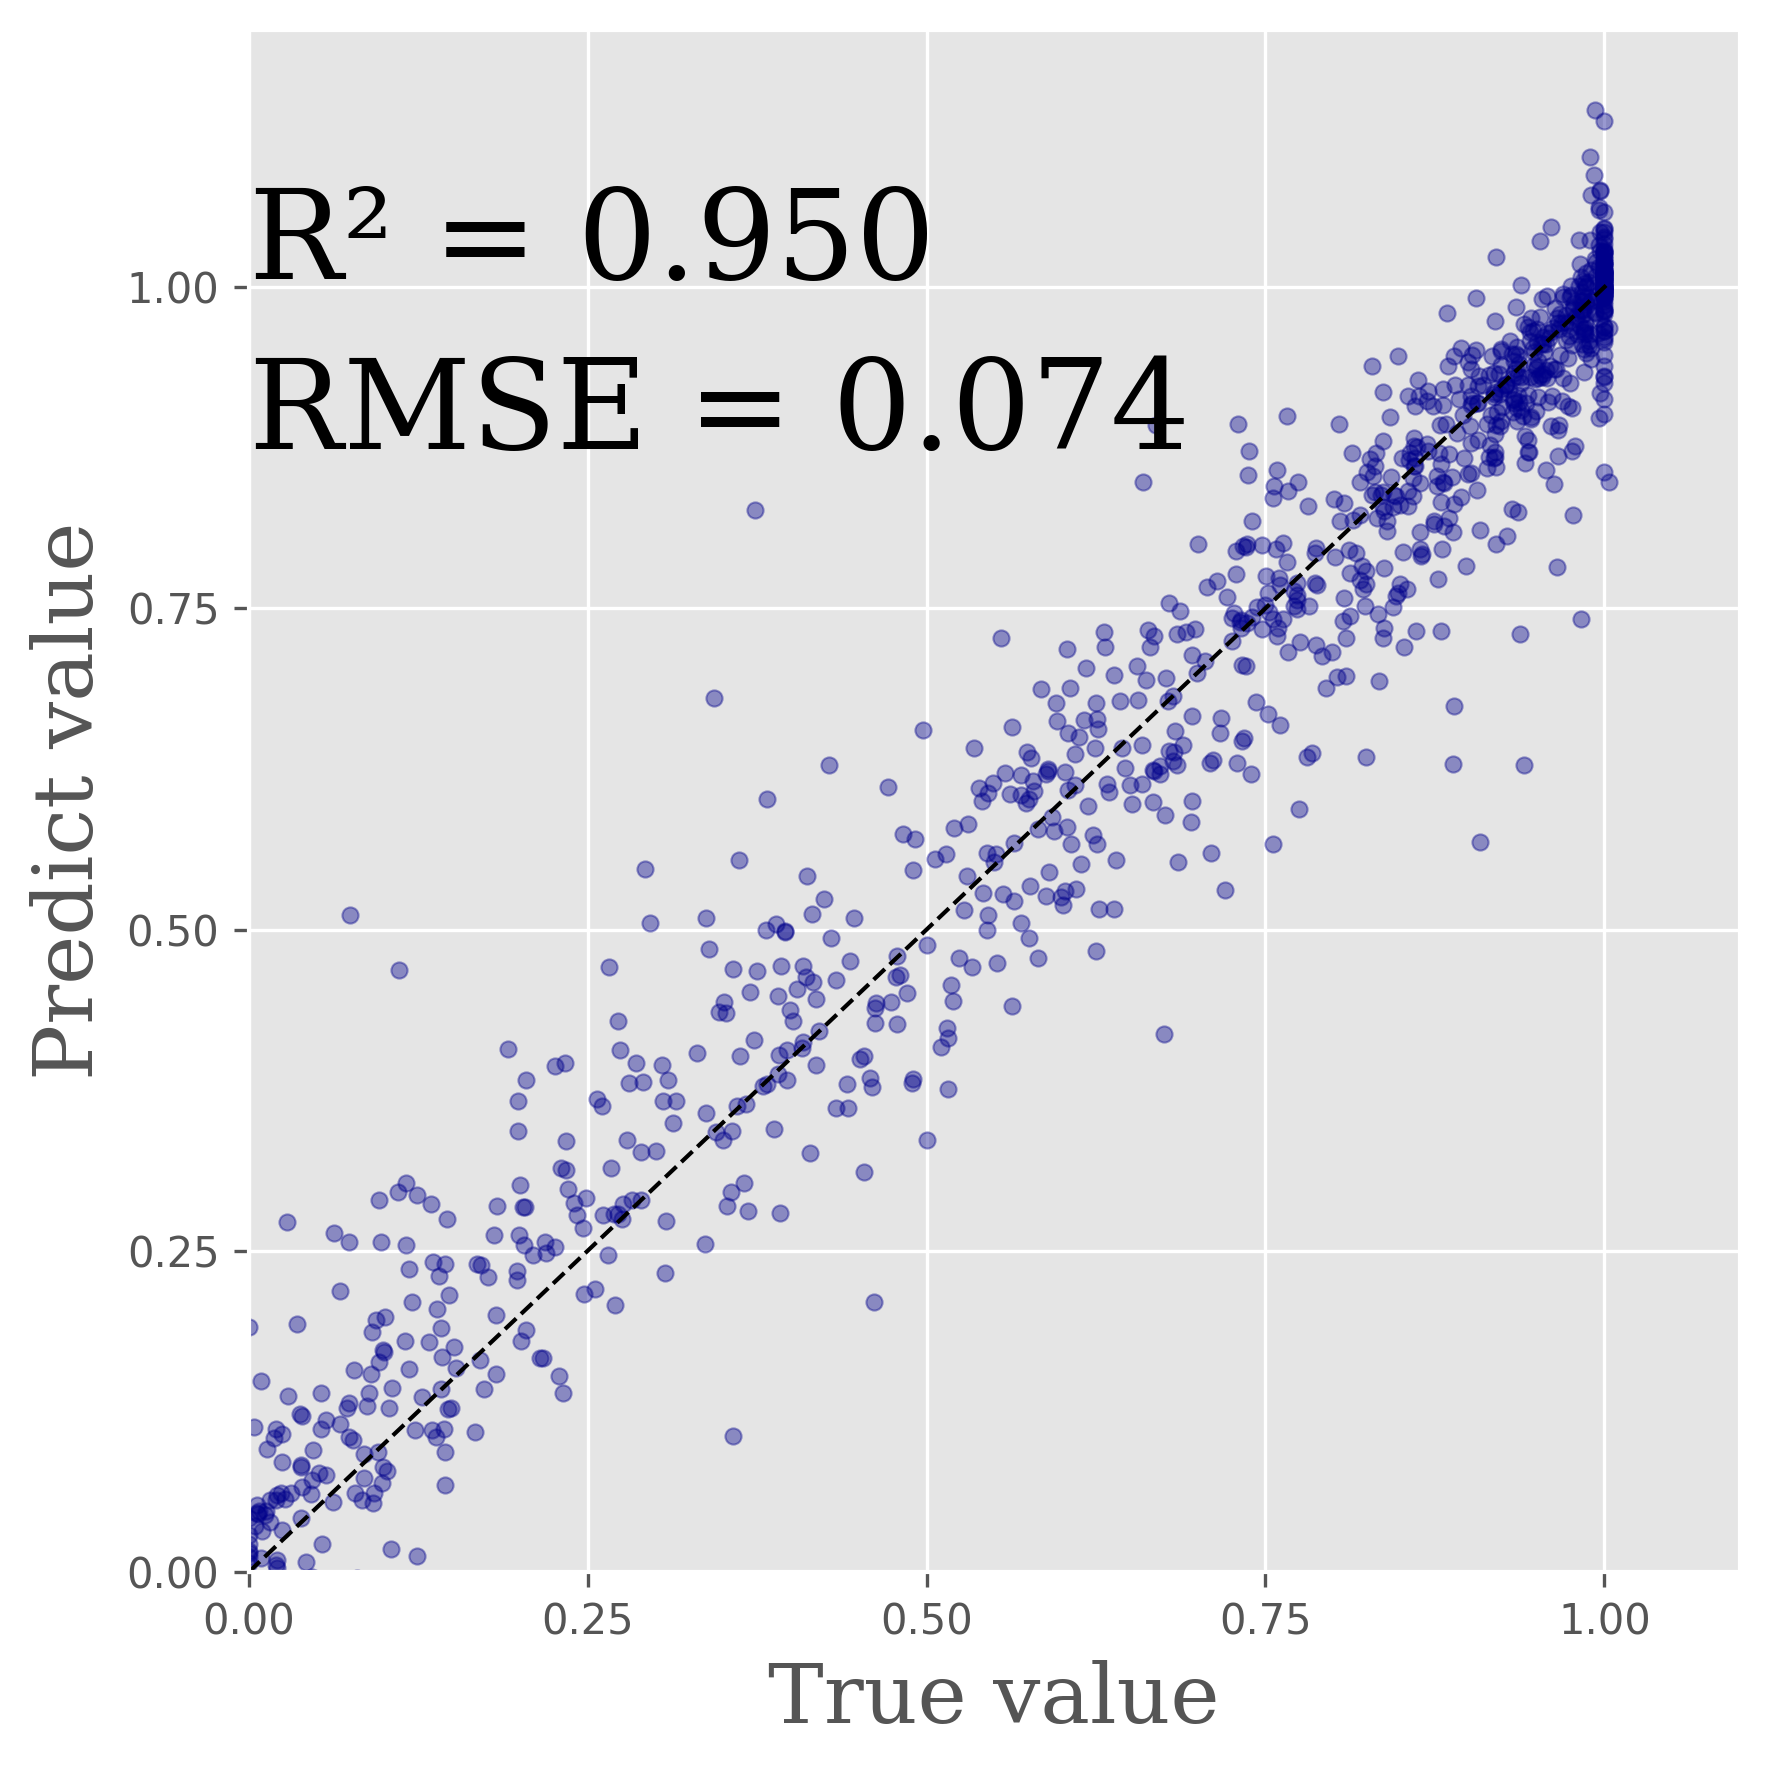

In [15]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import train_test_split, KFold
random_state = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)
clf = XGBRegressor(random_state=42)
model.fit(X_train, y_train)
test_preds = model.predict(X_test)
r2 = r2_score(y_test, test_preds)
rmse = np.sqrt(mean_squared_error(y_test, test_preds))
print(f'r2: {r2}, rmse: {rmse}')
plot_true_vs_pred(y_test, test_preds, 'current_feature', './', r2,rmse, True)

13
r2: 0.9461747934893185, rmse: 0.07745802768849841


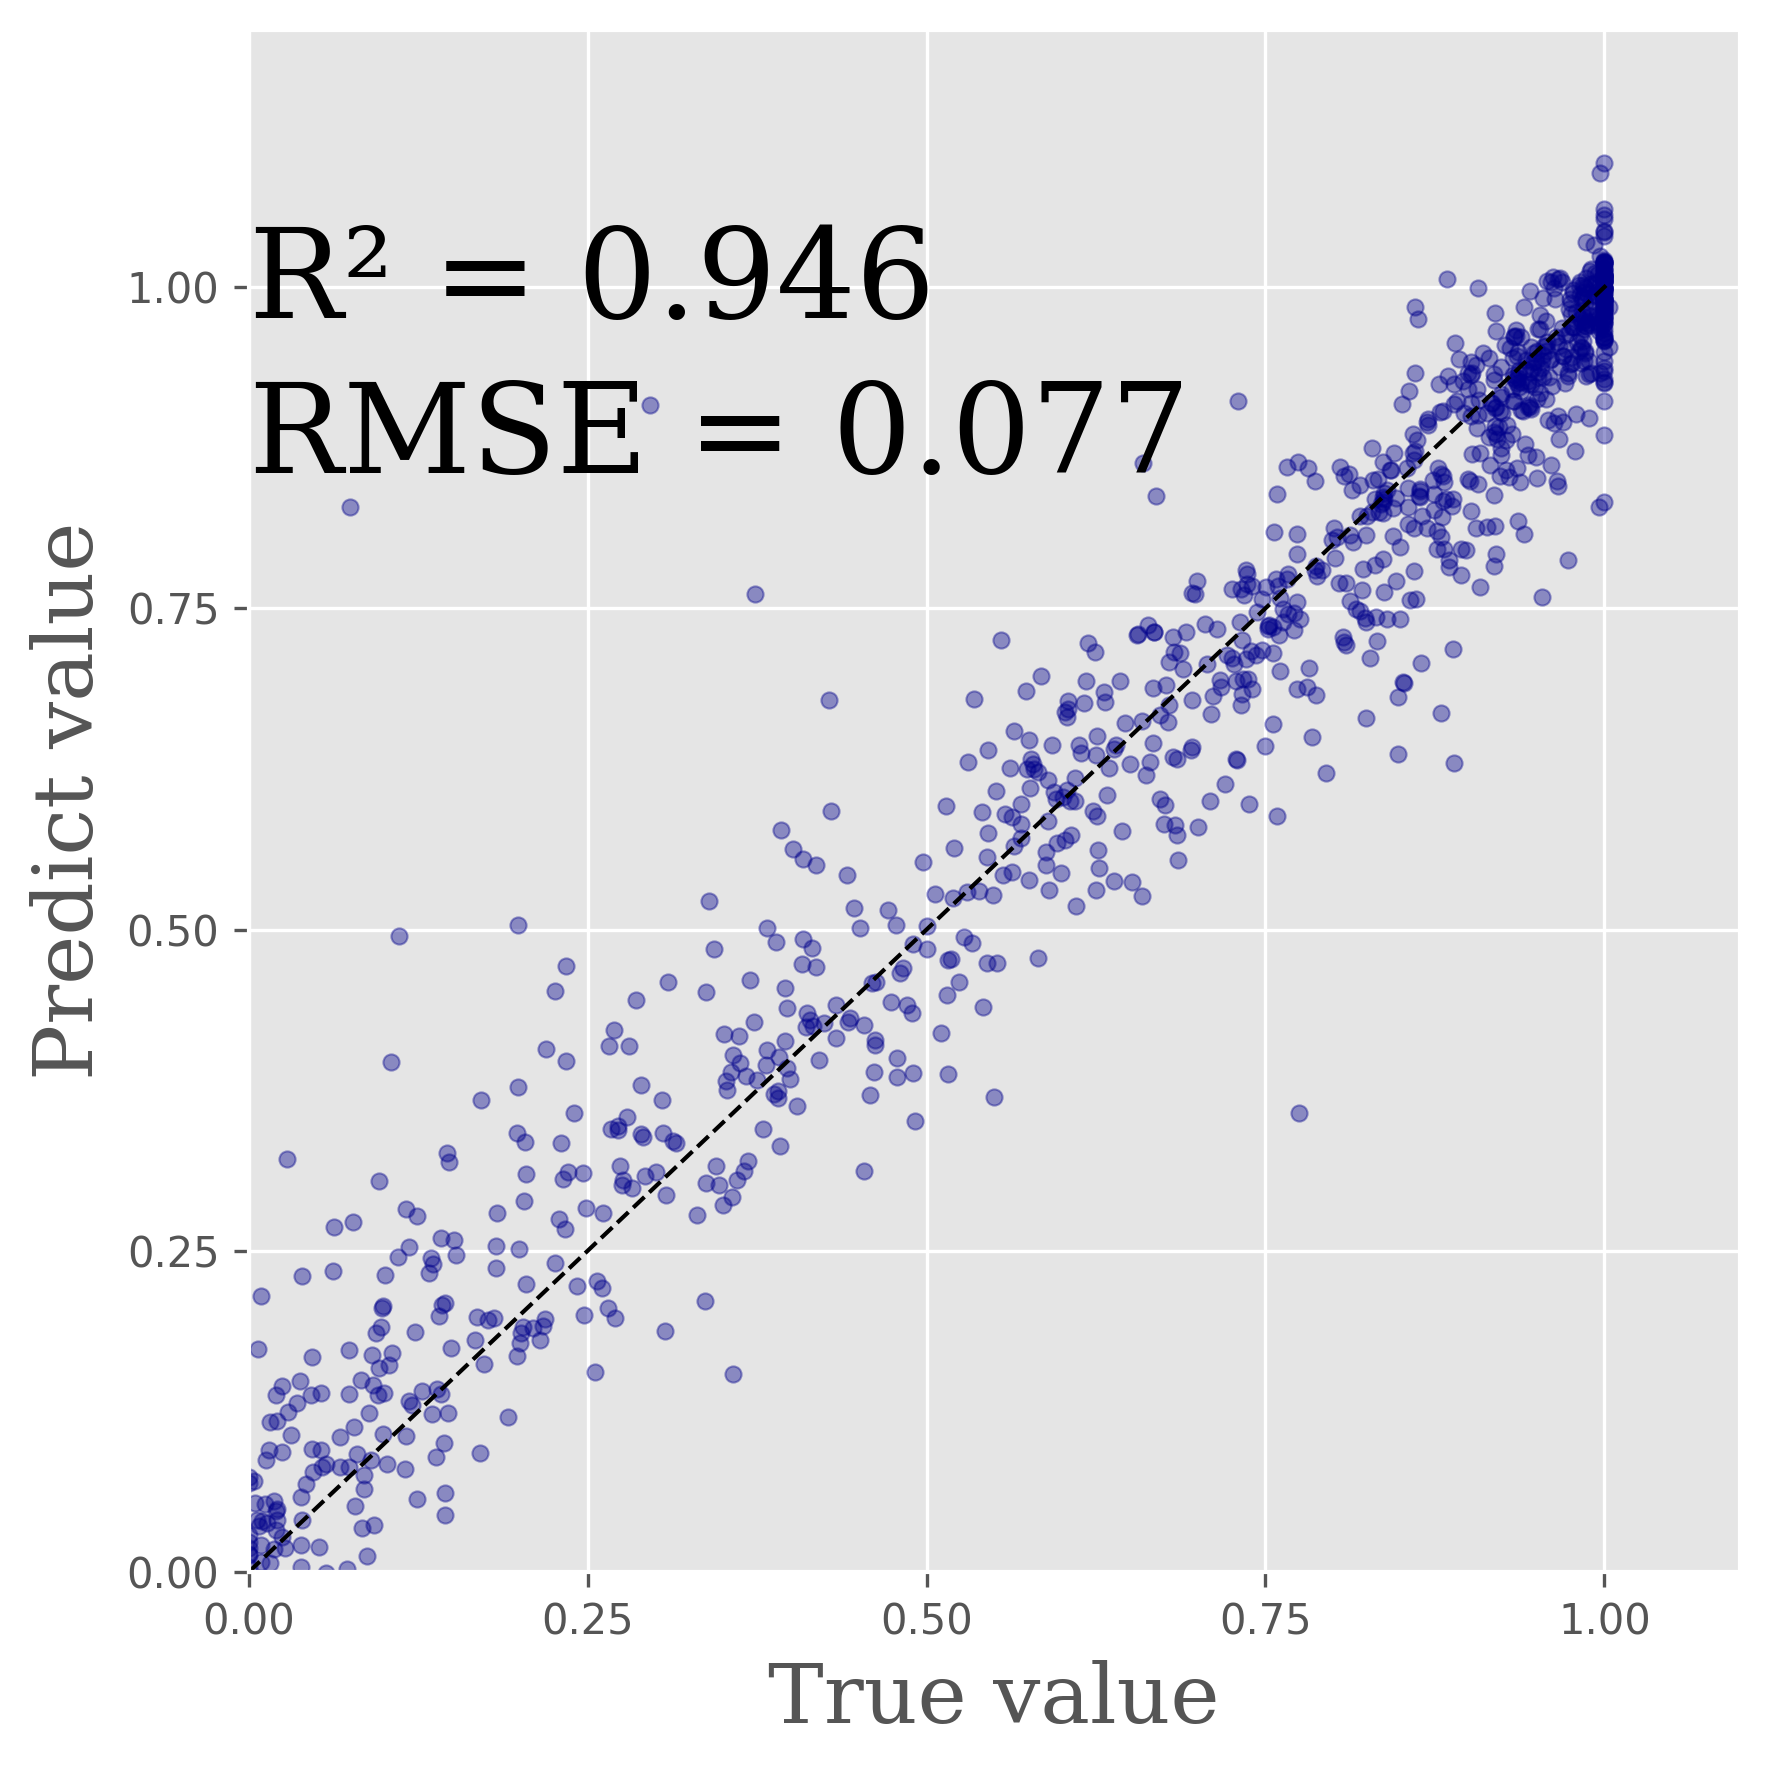

In [16]:
solution_polar = ['TPSA','COMPOUND_LogP', 'COMPOUND_HBD', 'COMPOUND_HBA','molecular_weight','Molecular polarity index (MPI) (kcal/mol)', 'Polar surface area percentage',  'Dipole Moment (a.u.)']
feature_names = solution + solution_polar
print(len(feature_names))
model = XGBRegressor(random_state=42)
X = df.loc[:,feature_names].values
y = df['Rf'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)
clf = XGBRegressor(random_state=42)
model.fit(X_train, y_train)
test_preds = model.predict(X_test)
r2 = r2_score(y_test, test_preds)
rmse = np.sqrt(mean_squared_error(y_test, test_preds))
print(f'r2: {r2}, rmse: {rmse}')
plot_true_vs_pred(y_test, test_preds, 'phiscochemical_descriptor', './', r2,rmse, True)

172
r2: 0.9503765844191443, rmse: 0.07437327548149485


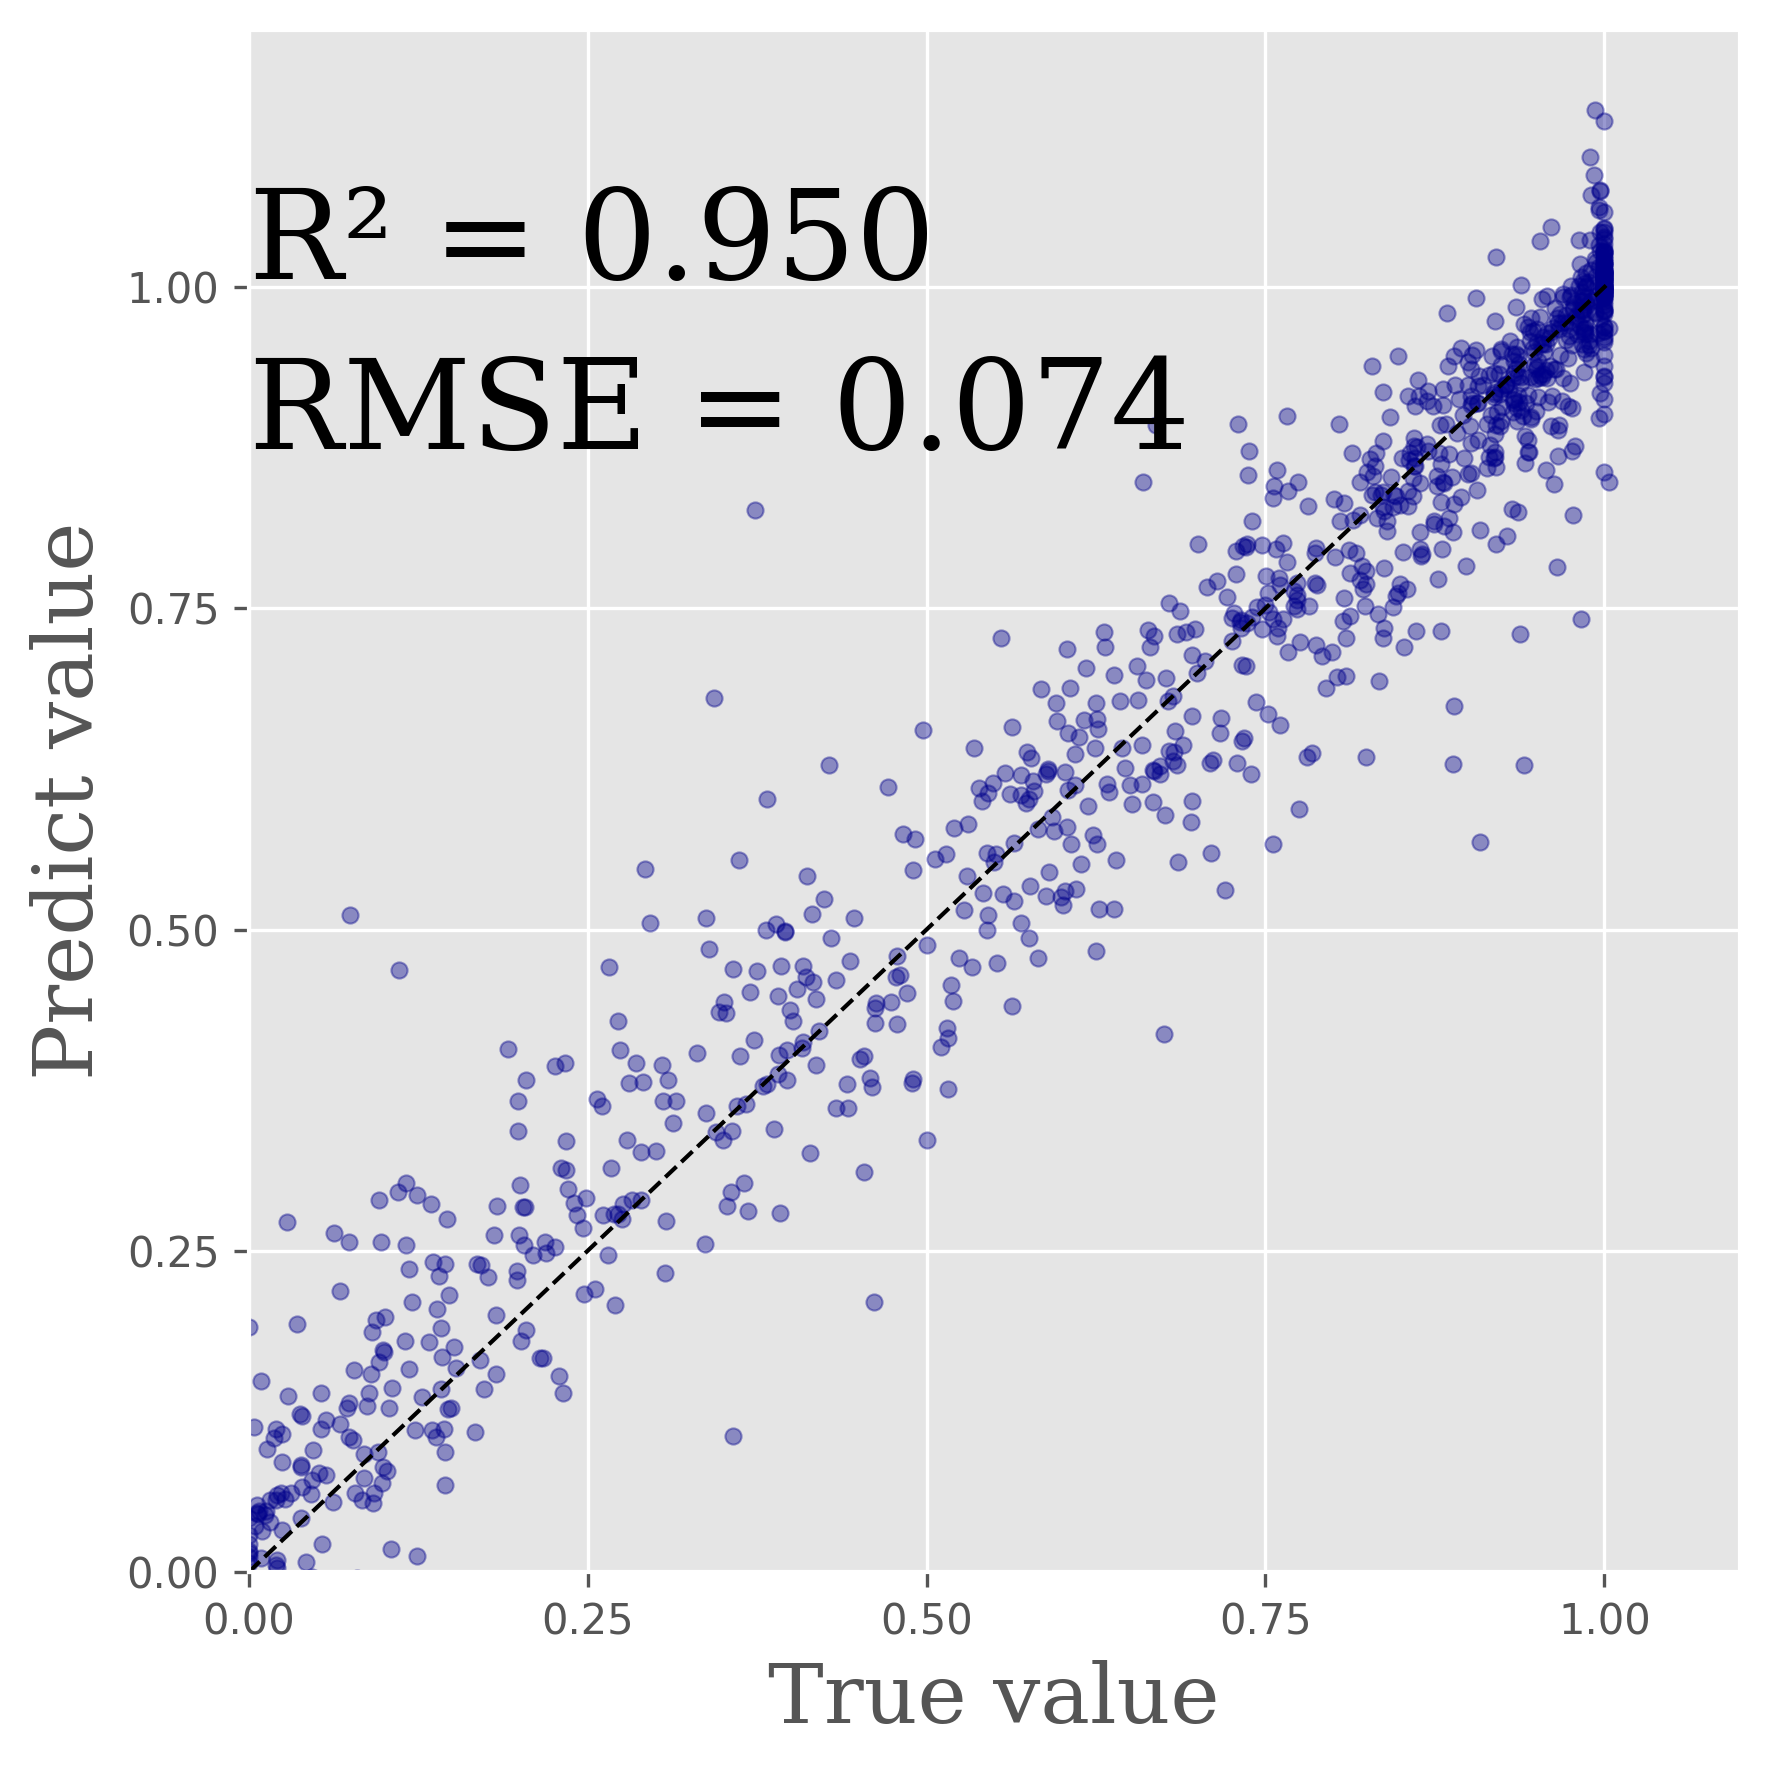

In [17]:
feature_names = solution + MACCs
print(len(feature_names))
model = XGBRegressor(random_state=42)
X = df.loc[:,feature_names].values
y = df['Rf'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)
clf = XGBRegressor(random_state=42)
model.fit(X_train, y_train)
test_preds = model.predict(X_test)
r2 = r2_score(y_test, test_preds)
rmse = np.sqrt(mean_squared_error(y_test, test_preds))
print(f'r2: {r2}, rmse: {rmse}')
plot_true_vs_pred(y_test, test_preds, 'MACCS', './', r2,rmse, True)